# Quantum Harmonic Osscilator
### Christina Lee
### Physics Prerequisites: Quantum Mechanics
### Quantum Time Evolution Series
* [Quantum Harmonic Osscillator](../Prerequisites/QHO.ipynb)
* [Quantum Time Evolution](../Prerequisites/Time-Evolution.ipynb)
* [Quantum Ground States: Imaginary Time](../Prerequisites/Imaginary-Time-Evolution.ipynb)

<b>Slinkies</b>. They started out as toys.  I still have one to play with on my desk.  
<b>Rubber bands</b> What was once something useful, is now a wonderful projectile weapon.  
<b> Swings</b> I still love them, but people seem to not make them in adult sizes for some reason.

A person's perception of these objects start to change as they enter their first physics class.  Even in that beginning classical mechanics, the problems are filled with harmonic osscilators, like slinkies, rubber bands, or swings, which exert a force proportional to their displacement
\begin{equation}
F=-kx
\end{equation}
and therefore a quadratic potential
\begin{equation}
V(x)=\frac{1}{2} k x^2
\end{equation}

This is all extremely fun and useful in the classical regime, but we add Quantum Mechanics to the mix, and LOW AND BEHOLD! we have one of the few exactly solvable models in Quantum Mechanics. Moreso, this solution demonstrates some extremely important properties of quantum mechanical systems.

##### The Hamiltonian
\begin{equation}
    {\cal H}= \frac{p^2}{2 m} + \frac{1}{2} m \omega ^2 x^2
\end{equation}

##### The Solution
\begin{equation}
    \Psi (x) = \frac{1}{\sqrt{2^n n!}} \left(\frac{m \omega}{\hbar \pi}\right)^{1/4} \mathrm{e}^{-m \omega x^2/2 \hbar}  H_n \left( \sqrt{\frac{m \omega}{\hbar}} x \right)
\end{equation}
Today, I just intend to present the form of the solution, calculate this equation numerically, and visualize the results.  If you wish to know how the equation is derived, you can find a standard quantum mechanics textbook, or stay tuned till I manage to write it up.

### Physicists' Hermite Polynomials
Note: These are not the same as the "probabilists' Hermite Polynomial".  The two functions differ by scaling factors.

Physicists' Hermite polynomials are defined as eigenfunctions for the differential equation
\begin{equation}
u^{\prime \prime}-2xu^{\prime} = -2 \lambda u
\end{equation}

\begin{equation}
H_n(x) = (-1)^n \mathrm{e}^{x^2} \frac{\mathrm{d}^n}{\mathrm{d}x^n}
\left( e^{-x^2} \right)
\end{equation}

I leave it as an exercise to the reader (muahahahaha) to
* demonstrate othogonality with respect to the measure $e^{-x^2}$, ie
\begin{equation}
\int_{-\infty}^{\infty} H_m(x) H_n(x) e^{-x^2} \mathrm{d}x = \sqrt{\pi} 2^n n! \delta_{mn}
\end{equation}
* demonstrate completeness.  This means we can describe every function by a linear combination of Hermite polynomials, provided it is suitably well behaved.


Though a formula exists for calculating a function at $n$ directly, the most efficient method at low $n$ for calculating polynomials relies on recurrence relationships.  These recurrence relationships will also be quite handy if you ever need to show orthogonality, or expectation values.  
##### Recurrence Relations
\begin{equation}
H_{n+1}(x) = 2xH_n(x) - H^{\prime}_n(x)
\end{equation}
\begin{equation}
H^{\prime}_n(x) = 2n H_{n-1}(x)
\end{equation}
\begin{equation}
H_{n+1}(x) = 2x H_n(x) - 2n H_{n-1}(x)
\end{equation}

In [1]:
using Roots;
using Plots
pyplot()

Plots.PyPlotBackend()

#### Programming Tip!  
Since Hermite polynomials are generated recursively, I wanted to generate and save all the functions up to a designated value at once.  In order to do so, I created an array, whose values are anonymous functions.  

In [2]:
function GenerateHermite(n)
    Hermite=Function[]
    
    push!(Hermite,x->1);
    push!(Hermite,x->2*x);
    
    for ni in 3:n
        push!(Hermite,x->2*x.*Hermite[ni-1](x)-2*n.*Hermite[ni-2](x))
    end
    return Hermite
end

GenerateHermite (generic function with 1 method)

So let's generate some Hermite polynomials and look at them.  
<b> Make sure you don't call a Hermite you haven't generated yet!

In [3]:
Hermite=GenerateHermite(5);

#### Programming Tip! 
Since the Hermite polynomials, and the wavefunctions after them, are composed on anonymous functions, we need to use `map(f,x)` in order to map the function `f` onto the array `x`.  Otherwise our polynomials only work on single values.

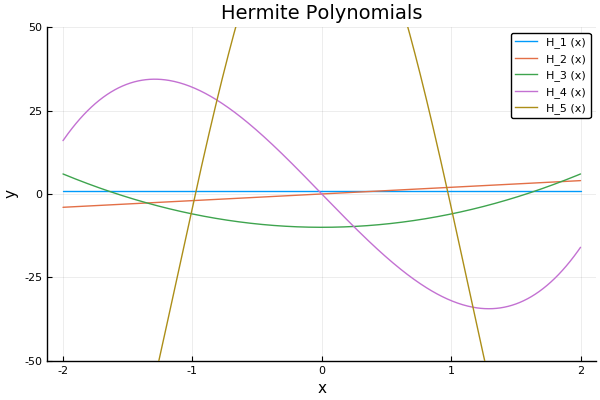

In [4]:
x=collect(-2:.01:2);
plot(ylims=(-50,50))
for j in 1:5
    plot!(x,map(Hermite[j],x),label="H_$j (x)")
end
plot!(xlabel="x",ylabel="y",title="Hermite Polynomials")

In [5]:
# Let's make our life easy and set all units to 1
m=1
ω=1
ħ=1

#Finally, we define Ψ
Ψ(n,x)=1/sqrt(factorial(n)*2^n)*(m*ω/(ħ*π))^(1/4)*exp(-m*ω*x^2/(2*ħ))*Hermite[n](sqrt(m*ω/ħ)*x)

Ψ (generic function with 1 method)

### Finding Zeros
The eigenvalue maps to the number of zeros in the wavefunction.  Below, I use Julia's roots package to identify roots on the interval from -3 to 3.  

In [6]:
zeds=Array{Array{Float64}}(undef,1)
zeds[1]=[] #ground state has no zeros
for j in 2:4
    push!(zeds,fzeros(y->Ψ(j,y),-3,3))
end

In [7]:
zeds[3]

2-element Array{Float64,1}:
 -1.5811388300841895
  1.5811388300841895

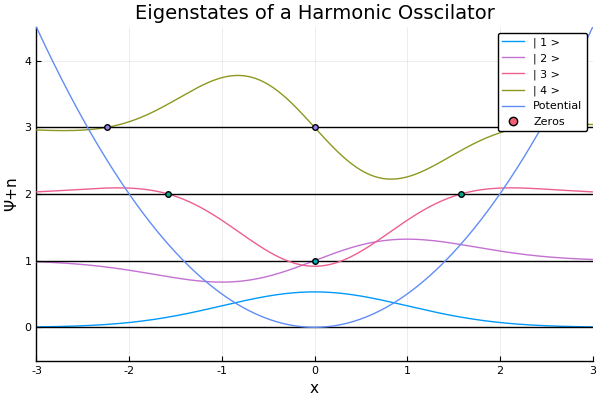

In [8]:
# AHHHHH! So Much code!
# Don't worry; it's all just plotting
x=collect(-3:.01:3)  #Set some good axes

plot(xlim=(-3,3),ylim=(-.5,4.5))
for j in 1:4    #how many do you want to view? 
    plot!(x,map.(y->Ψ(j,y),x).+j.-1,label="| $j >") 
    plot!(x,(j-1)*ones(length(x)),
        color="black",label="")
    scatter!(zeds[j],(j-1)*ones(length(zeds[j])),
        label="")
end

plot!(x,.5*m*ω^2*x.^2,label="Potential")

scatter!([],[],label="Zeros")

plot!(xlabel="x",ylabel="Ψ+n",legend=:topright,
    title="Eigenstates of a Harmonic Osscilator")

## Example Result

![My first four Eigenstates](../images/QHO/eigenstates.png)

## More to come
This barely scratched the surface into the richness that can be seen in the quantum harmonic osscilator.  Here, just we developed a way for calculating the functions, and visualized the results.  Stay tuned to hear here about ground state energy, ladder operators, and atomic trapping.